# Astroinformatics
## Class 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import itertools
import os

## Basic scipy stats methods
Complete tutorial [here](https://docs.scipy.org/doc/scipy-0.19.1/reference/tutorial/stats.html)

Example of random variable [here](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.norm.html#scipy.stats.norm)

In [2]:
# Initialize a random variable
rv = stats.norm()
help(rv)

Help on rv_frozen in module scipy.stats._distn_infrastructure object:

class rv_frozen(builtins.object)
 |  # Frozen RV class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dist, *args, **kwds)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cdf(self, x)
 |  
 |  entropy(self)
 |  
 |  expect(self, func=None, lb=None, ub=None, conditional=False, **kwds)
 |  
 |  interval(self, alpha)
 |  
 |  isf(self, q)
 |  
 |  logcdf(self, x)
 |  
 |  logpdf(self, x)
 |  
 |  logpmf(self, k)
 |  
 |  logsf(self, x)
 |  
 |  mean(self)
 |  
 |  median(self)
 |  
 |  moment(self, n)
 |  
 |  pdf(self, x)
 |  
 |  pmf(self, k)
 |  
 |  ppf(self, q)
 |  
 |  rvs(self, size=None, random_state=None)
 |  
 |  sf(self, x)
 |  
 |  stats(self, moments='mv')
 |  
 |  std(self)
 |  
 |  var(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (

In [3]:
# Sampling from a random variable
help(stats.norm.rvs)

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(*args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Random variates of given type.
    
    Parameters
    ----------
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    scale : array_like, optional
        Scale parameter (default=1).
    size : int or tuple of ints, optional
        Defining number of random variates (default is 1).
    random_state : None or int or ``np.random.RandomState`` instance, optional
        If int or RandomState, use it for drawing the random variates.
        If None, rely on ``self.random_state``.
        Default is None.
    
    Returns
    -------
    rvs : ndarray or scalar
        Random variates of given `size`.



In [4]:
random_state = 1234  # To ensure reproducibility
samples = rv.rvs(size=(3,4), random_state=random_state)
print(samples)
print(samples.shape)

[[ 0.47143516 -1.19097569  1.43270697 -0.3126519 ]
 [-0.72058873  0.88716294  0.85958841 -0.6365235 ]
 [ 0.01569637 -2.24268495  1.15003572  0.99194602]]
(3, 4)


In [5]:
# Shifting and Scaling
# Shiffting and Scaling applies the transformation (x - loc)/scale to X
help(stats.norm.stats)

Help on method stats in module scipy.stats._distn_infrastructure:

stats(*args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Some statistics of the given RV.
    
    Parameters
    ----------
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional (continuous RVs only)
        scale parameter (default=1)
    moments : str, optional
        composed of letters ['mvsk'] defining which moments to compute:
        'm' = mean,
        'v' = variance,
        's' = (Fisher's) skew,
        'k' = (Fisher's) kurtosis.
        (default is 'mv')
    
    Returns
    -------
    stats : sequence
        of requested moments.



In [6]:
rv = stats.norm(loc = 5.0, scale = 2.0) # Freezing Distribution
samples = rv.rvs(size=10)
print(samples[:10])
print("mean: " + str(np.mean(samples)))
print("scale :" + str(np.std(samples)))

[ 10.19671297   4.82768417   4.49655201   8.29287919   5.86670205
   5.82997501   5.77862931   5.53172528   5.24005421   4.05069289]
mean: 6.01116070887
scale :1.76622219079


In [7]:
# Some distributions have extra arguments, called shape arguments
print(stats.norm.shapes)
print(stats.poisson.shapes)
print(stats.gamma.shapes)

None
mu
a


# Important Distributions

## Discrete Distributions
- Discrete Uniform
- Bernoulli
- Binomial
- Geometric
- HyperGeometric
- Poisson
- Planck
- Discrete Laplacian

Most part of the description is from wikipedia

### Discrete Uniform
$X \sim \mathcal{U}(a,b)$ 

$$ \text{pmf}(x) = \left\{\begin{matrix}
\frac{1}{n} & \text{if} \hspace{0.2cm} x \in [a, b] \\ 
0 & \text{if not}
\end{matrix}\right. $$

### Bernoulli
$X \sim Be(p)$, $X$ takes the value 1 with probability $p$ and the value 0 with probability $q = 1-p$

$$ \text{pmf}(x, p) = p^{x}(1-p)^{1-x} \hspace{0.2cm} \text{with} \hspace{0.2cm} x \in \{0, 1\}$$

### Binomial
$X \sim B(n, p)$, The probability of getting exactly x successes in n trials of independent experiments with Bernoulli distribution $Be(p)$. If $n=1, X \sim Be(p)$

$$ \text{pmf}(x, n, p) = \binom{n}{x} p^{x}(1-p)^{n-x} \hspace{0.2cm} \text{with} \hspace{0.2cm} x \in \{0, 1, 2, ... , n\}$$

In [8]:
def print_parameters(distr_dict):
    for key, value in distr_dict.items():
        print(key+": {}".format(value.kwds))

In [9]:
discrete_distr = {}
discrete_distr["d_uniform"] = stats.randint(low=3, high=20, loc=5.0)
discrete_distr["bernoulli"] = stats.bernoulli(p=0.3)
discrete_distr["binomial"] = stats.binom(p=0.7, n=10)
print_parameters(discrete_distr)

d_uniform: {'low': 3, 'high': 20, 'loc': 5.0}
bernoulli: {'p': 0.3}
binomial: {'p': 0.7, 'n': 10}


### Geometric
$X \sim G(p)$, The probability distribution of the number X of Bernoulli(p) trials needed to get one success

$$ \text{pmf}(x, p) = (1-p)^{x-1}p \hspace{0.2cm} \text{with} \hspace{0.2cm}  x \in \mathbb{N}^{+}$$

### HyperGeometric
$X \sim H(n, N, K)$, describes the probability of x successes in n draws, without replacement, from a finite population of size N that contains exactly K successes, wherein each draw is either a success or a failure. In contrast, the binomial distribution describes the probability of x successes in n draws with replacement.

$$ \text{pmf}(x, n, N, K) = \frac{\binom{K}{x}\binom{N-K}{n-x}}{\binom{N}{n}} $$

### Poisson
$X \sim P(\mu)$, The Poisson distribution is popular for modelling the number of times an event occurs in an interval of time or space. It describes the probability of getting x number of events if they happen at a rate of $\mu$

$$ \text{pmf}(x, \mu) = \frac{\mu^{x}e^{-\mu}}{x!}$$

In [10]:
discrete_distr["geom"] = stats.geom(p=0.3)
discrete_distr["hypergeom"] = stats.hypergeom(M=100, N=60, n=50) # M=N, N=K, n=n from the previous description 
discrete_distr["poisson"] = stats.poisson(mu=40)
print_parameters(discrete_distr)

d_uniform: {'low': 3, 'high': 20, 'loc': 5.0}
bernoulli: {'p': 0.3}
binomial: {'p': 0.7, 'n': 10}
geom: {'p': 0.3}
hypergeom: {'M': 100, 'N': 60, 'n': 50}
poisson: {'mu': 40}


### Planck
$X \sim Planck(\lambda)$ Named Planck because of its relationship to the black-body problem he solved.

$$ \text{pmf}(x, \lambda) = (1-e^{-\lambda})*e^{-\lambda x} $$

### Discrete Laplacian
$X \sim Laplace(a)$

$$ \text{pmf}(x, a) = \tanh\left(\frac{a}{2}\right )e^{-a \left |x \right|}$$

In [11]:
discrete_distr["planck"] = stats.planck(0.2,loc=2.0) #lambda=0.2
discrete_distr["laplacian"] = stats.dlaplace(a=1.2) 
print_parameters(discrete_distr)

d_uniform: {'low': 3, 'high': 20, 'loc': 5.0}
bernoulli: {'p': 0.3}
binomial: {'p': 0.7, 'n': 10}
geom: {'p': 0.3}
hypergeom: {'M': 100, 'N': 60, 'n': 50}
poisson: {'mu': 40}
planck: {'loc': 2.0}
laplacian: {'a': 1.2}


In [12]:
prob_functions = {}
def plot_pmf(ax, distr, distr_name):
    x = np.arange(distr.ppf(0.001),
                 distr.ppf(0.99999)) # Inverse cumulative distribution
    ax.plot(x, distr.pmf(x), 'bo', ms=8)
    ax.set_title(distr_name)
    prob_functions[distr_name] = [x, distr.pmf(x)]
    ax.vlines(x, 0, distr.pmf(x), colors='b', lw=5, alpha=0.5)

d_uniform: {'low': 3, 'high': 20, 'loc': 5.0}
bernoulli: {'p': 0.3}
binomial: {'p': 0.7, 'n': 10}
geom: {'p': 0.3}
hypergeom: {'M': 100, 'N': 60, 'n': 50}
poisson: {'mu': 40}
planck: {'loc': 2.0}
laplacian: {'a': 1.2}


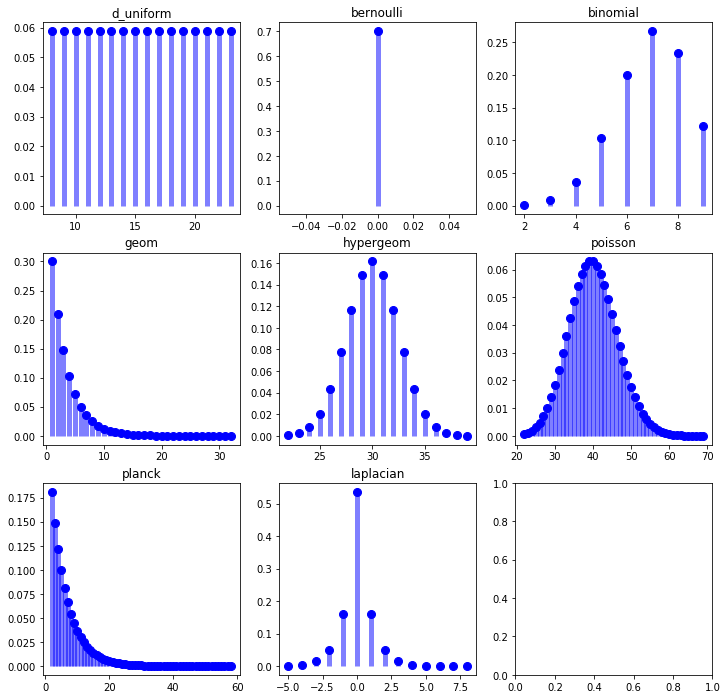

In [13]:
# Print parameters one more time
print_parameters(discrete_distr)
# Plot pmf of each distribution
fig, ax = plt.subplots(3,3,figsize=(12,12))
a = np.arange(3)
axis_index = list(itertools.product(a, a))
for i, [key, value] in enumerate(discrete_distr.items()):
    plot_pmf(ax[axis_index[i]], value, key)
plt.show()

## Continuous Distributions
- Normal (or Gaussian)
- Uniform
- Exponential
- Gamma
- Beta
- Chi-Squared
- Student's t
- Multivariate normal

### Normal
$X \sim \mathcal{N}(0, 1)$ The central limit theorem states that under certain (fairly common) conditions, the sum of many random variables will have an approximately normal distribution. We can control the mean and variance by shifting and scaling

$$ f(x)=\frac{1}{\sqrt{2\pi }}e^{\frac{-(x)^{2}}{2}}$$

### Uniform
$X \sim \mathcal{U}(a,b)$, in scipy is constant between loc and loc+scale

$$ f(x, a, b) = \left\{\begin{matrix}
\frac{1}{b-a} & \text{if} \hspace{0.2cm} x \in [a, b] \\ 
0 & \text{if not}
\end{matrix}\right. $$

### Exponential
$X \sim exp(\lambda)$, is the probability distribution that describes the time between events in a Poisson process, i.e. a process in which events occur continuously and independently at a constant average rate. It is a particular case of the gamma distribution. In this case we control $\lambda$ by scaling $x$ with $scale = 1/\lambda$, on scipy $\lambda=1$ by default.

$$ f(x, \lambda) = \left\{\begin{matrix}
\lambda e^{-\lambda x} & \text{if} \hspace{0.2cm} x \geq 0 \\ 
0 & \text{if not}
\end{matrix}\right. $$

In [14]:
cont_distr = {}
cont_distr["normal"] = stats.norm(loc=3.0, scale=2.0)
cont_distr["c_uniform"] = stats.uniform(loc=-2, scale=10)
cont_distr["exponential"] = stats.expon(scale=1/0.9)
print_parameters(cont_distr)

normal: {'loc': 3.0, 'scale': 2.0}
c_uniform: {'loc': -2, 'scale': 10}
exponential: {'scale': 1.1111111111111112}


### Gamma
$X \sim \Gamma(a,b)$, The gamma distribution has been used to model the size of insurance claims and rainfalls. This means that aggregate insurance claims and the amount of rainfall accumulated in a reservoir are modelled by a gamma process. We control $b$ through the scale

$$ f(x, a, b) = \frac{x^{a-1}e^{-x/b}}{b^{a}\Gamma(a)} $$

### Beta
$X \sim Beta(a,b)$, in Bayesian inference, the beta distribution is the conjugate prior probability distribution for the Bernoulli, binomial, negative binomial and geometric distributions. For example, the beta distribution can be used in Bayesian analysis to describe initial knowledge concerning probability of success such as the probability that a space vehicle will successfully complete a specified mission.

$$ f(x, a, b) = \frac{\Gamma(a+b) x^{a-1} (1-x)^{b-1}}{\Gamma(a)*\Gamma(b)}$$

### Chi-Squared
$X \sim \chi(k)$, is one of the most widely used probability distributions in inferential statistics, e. g., in hypothesis testing or in construction of confidence intervals 

$$ f(x, k) = \frac{1}{2\Gamma(k/2)} \left ( \frac{x}{2} \right )^{\frac{k}{2}-1}e^{-x/2} $$

In [15]:
cont_distr["gamma"] = stats.gamma(a=2.0, scale=1.5)
cont_distr["beta"] = stats.beta(a=2.3, b=5.0)
cont_distr["chi2"] = stats.chi2(df=50)
print_parameters(cont_distr)

normal: {'loc': 3.0, 'scale': 2.0}
c_uniform: {'loc': -2, 'scale': 10}
exponential: {'scale': 1.1111111111111112}
gamma: {'a': 2.0, 'scale': 1.5}
beta: {'a': 2.3, 'b': 5.0}
chi2: {'df': 50}


### Student's t
$X \sim T(t)$, The t-distribution plays a role in a number of widely used statistical analyses, including Student's t-test for assessing the statistical significance of the difference between two sample means, the construction of confidence intervals for the difference between two population means, and in linear regression analysis.

$$ f(x,t) = \frac{\Gamma(\frac{t+1}{2})}{\sqrt{t \pi}\Gamma(t/2)}\left( 1+\frac{x^{2}}{t} \right)^{-\frac{t+1}{2}} $$

### Multivariate Normal
$X \sim N(\mathbb{\mu}, \mathbb{\Sigma})$,s a generalization of the one-dimensional (univariate) normal distribution to higher dimensions.

$$ f(x, \mu, \Sigma) = \frac{1}{\sqrt{\left | 2\pi \Sigma \right |}}e^{-\frac{1}{2}(x-\mu)^{T}\Sigma^{-1}(x-\mu)}$$

In [16]:
cont_distr["t-student"] = stats.t(df=2.5)
multi_normal_mean = np.array([2, 3])
covariance_matrix = np.array([[2.0, 0.3], [0.3, 0.5]])
mvn_distr = stats.multivariate_normal(mean=multi_normal_mean, cov=covariance_matrix)
print_parameters(cont_distr)

normal: {'loc': 3.0, 'scale': 2.0}
c_uniform: {'loc': -2, 'scale': 10}
exponential: {'scale': 1.1111111111111112}
gamma: {'a': 2.0, 'scale': 1.5}
beta: {'a': 2.3, 'b': 5.0}
chi2: {'df': 50}
t-student: {'df': 2.5}


In [17]:
def plot_pdf(ax, distr, distr_name):
    x = np.linspace(distr.ppf(0.001),
                 distr.ppf(0.999), 200) # Inverse cumulative distribution
    ax.plot(x, distr.pdf(x), 'b-', ms=8)
    ax.fill_between(x, 0, distr.pdf(x))
    ax.set_title(distr_name)
    prob_functions[distr_name] = [x, distr.pdf(x)]

normal: {'loc': 3.0, 'scale': 2.0}
c_uniform: {'loc': -2, 'scale': 10}
exponential: {'scale': 1.1111111111111112}
gamma: {'a': 2.0, 'scale': 1.5}
beta: {'a': 2.3, 'b': 5.0}
chi2: {'df': 50}
t-student: {'df': 2.5}


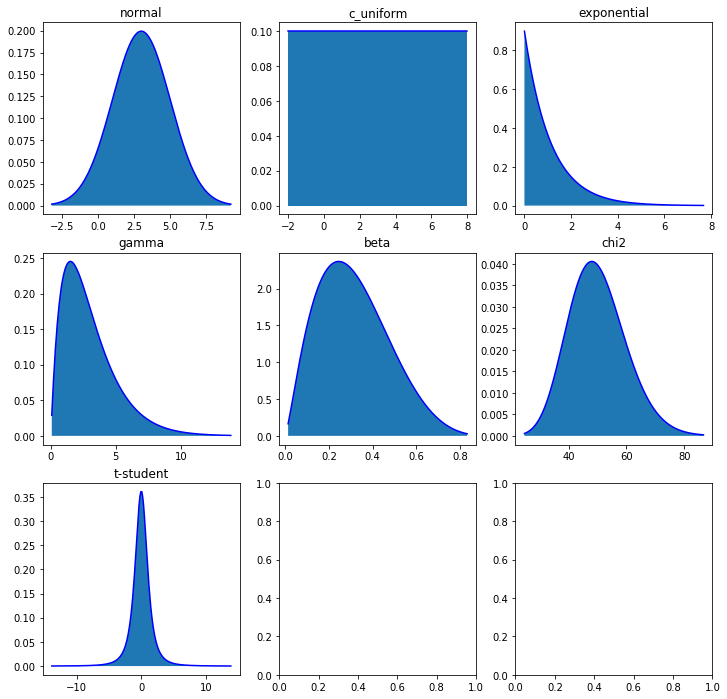

In [18]:
# Print parameters one more time
print_parameters(cont_distr)
# Plot pmf of each distribution
fig, ax = plt.subplots(3,3,figsize=(12,12))
a = np.arange(3)
axis_index = list(itertools.product(a, a))
for i, [key, value] in enumerate(cont_distr.items()):
    plot_pdf(ax[axis_index[i]], value, key)
plt.show()

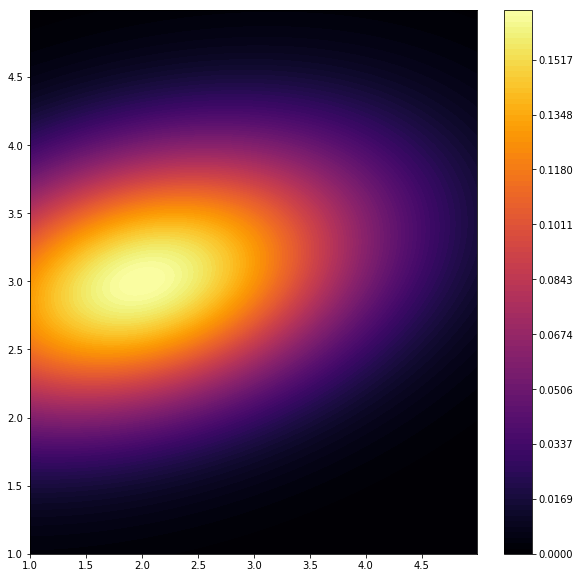

In [19]:
# Multivariate Normal
plt.figure(figsize=(10,10))
x, y = np.mgrid[1:5:.01, 1:5:.01]
pos = np.dstack((x, y))
levels = np.linspace(0, np.amax(mvn_distr.pdf(pos)), 100)
plt.contourf(x, y, mvn_distr.pdf(pos), levels=levels, cmap="inferno")
plt.colorbar()
plt.show()

## Data analysis from distributions using pandas

In [20]:
class Distributions(object):
    
    def __init__(self, distr_dict, n_samples=0):
        self.dataframe = pd.DataFrame()
        self.distr_dict = distr_dict
        self.distr_names = distr_dict.keys()
        self.analytical_stats = {}
        self.n_samples = 0
        for key, value in self.distr_dict.items():
            self.dataframe[key] = []
            self.analytical_stats[key] = value.stats()
        self.add_n_samples(n_samples)
        
        
    def __str__(self):
        return str(self.dataframe)
        
    def update_distributions(self, distr_dict=None):
        if not distr_dict:
            self.distr_dict = distr_dict
        for key, value in self.distr_dict.items():
            self.analytical_stats[key] = value.stats()
            
    def add_n_samples(self, n_samples):
        aux_df = pd.DataFrame()
        for key, value in self.distr_dict.items():
            aux_df[key] = value.rvs(size=n_samples)
        self.dataframe = pd.concat([self.dataframe, aux_df])
        self.n_samples += n_samples
        return aux_df
        
    def delete_n_samples(self, n_samples):
        self.dataframe.drop(np.arange(self.n_samples - n_samples, self.n_samples), axis=0)
        
    def re_sample(self):
        aux_df = pd.DataFrame()
        for key, value in self.distr_dict.items():
            aux_df[key] = value.rvs(size=n_samples)
        self.dataframe = aux_df
        
    def get_data_stats(self, stats='all'):
        df = self.dataframe.describe()
        if stats=="all":
            return df
        else:
            return df.loc[stats]
    
    def get_analytical_stats(self):
        for key, value in self.analytical_stats.items():
            print(key+": "+str(value))
        return self.analytical_stats
    
    def show_parameters(self):
        for key, value in self.distr_dict.items():
            print(key+": {}".format(value.kwds))
            
    def plot_histogram(self, distr="normal"):
        return

In [21]:
distr_dict = {**cont_distr, **discrete_distr}
print_parameters(distr_dict)

normal: {'loc': 3.0, 'scale': 2.0}
c_uniform: {'loc': -2, 'scale': 10}
exponential: {'scale': 1.1111111111111112}
gamma: {'a': 2.0, 'scale': 1.5}
beta: {'a': 2.3, 'b': 5.0}
chi2: {'df': 50}
t-student: {'df': 2.5}
d_uniform: {'low': 3, 'high': 20, 'loc': 5.0}
bernoulli: {'p': 0.3}
binomial: {'p': 0.7, 'n': 10}
geom: {'p': 0.3}
hypergeom: {'M': 100, 'N': 60, 'n': 50}
poisson: {'mu': 40}
planck: {'loc': 2.0}
laplacian: {'a': 1.2}


In [22]:
distr_object = Distributions(distr_dict, n_samples=5)
print(distr_object)
print(distr_object.get_data_stats(stats=["mean", "std"]))
analytical_stats = distr_object.get_analytical_stats()

     normal  c_uniform  exponential     gamma      beta       chi2  t-student  \
0  2.148066  -0.904083     0.239787  1.583500  0.234886  61.488711  -0.697288   
1  4.445684   0.551287     0.080991  0.805243  0.451051  43.801815   0.529917   
2  0.829271  -1.970809     1.863060  7.213935  0.509054  54.219159   0.222244   
3  1.114609   6.597143     0.080739  3.234226  0.339628  45.444479   0.133198   
4  7.168860   1.167145     0.271900  4.482977  0.214832  39.495288  -1.153663   

   d_uniform  bernoulli  binomial  geom  hypergeom  poisson  planck  laplacian  
0       18.0        0.0       7.0   2.0       31.0     39.0     3.0        0.0  
1       19.0        0.0       4.0   1.0       34.0     32.0     3.0        0.0  
2       12.0        0.0       6.0   4.0       29.0     48.0     5.0        0.0  
3       11.0        1.0       7.0   2.0       30.0     37.0    18.0       -1.0  
4       12.0        0.0       8.0   7.0       31.0     38.0     6.0        0.0  
        normal  c_uniform  

In [23]:
# Approximation to mean and variance
n_samples = 10
distr_object = Distributions(distr_dict, n_samples=n_samples)

mean_data = pd.DataFrame(columns=distr_object.distr_names)
std_data = pd.DataFrame(columns=distr_object.distr_names)
dataframes_per_iter = []

n_iter = 500
for i in range(n_iter): # on each iteration we add 10 more points sampled from each distr
    dataframes_per_iter.append(distr_object.dataframe)
    stats_df = distr_object.get_data_stats(stats=["mean", "std"])
    mean_data = pd.concat([mean_data, stats_df.head(1)], axis=0)
    std_data = pd.concat([std_data, stats_df.tail(2)], axis=0)
    distr_object.add_n_samples(n_samples)

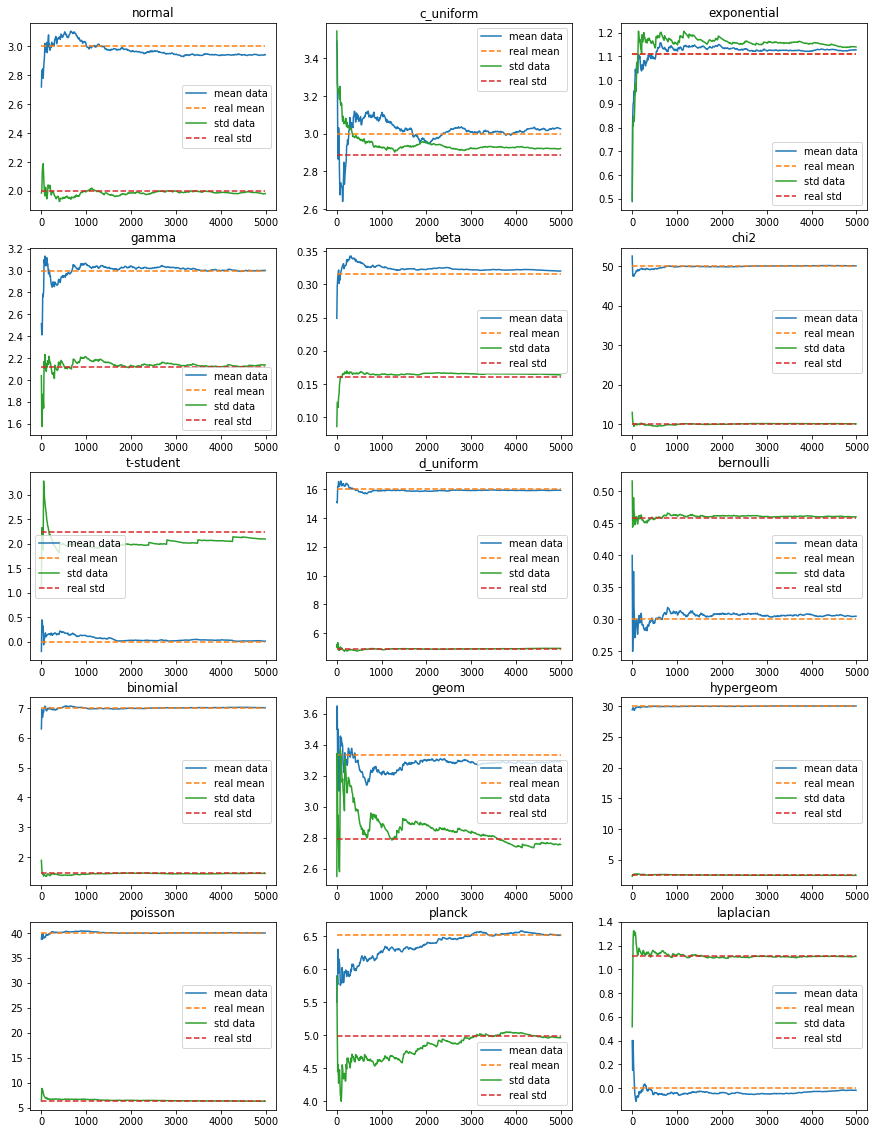

In [24]:
f, ax = plt.subplots(5, 3, figsize=(15,20))
a = np.arange(5)
b = np.arange(3)
axis_index = list(itertools.product(a, b))
samples_array = np.arange(n_iter)*n_samples

for i, key in enumerate(distr_object.distr_names):
    ax[axis_index[i]].plot(samples_array, mean_data.loc["mean",key], label="mean data")
    ax[axis_index[i]].plot(samples_array, analytical_stats[key][0]*np.ones((n_iter,)),'--' ,label = "real mean")
    ax[axis_index[i]].plot(samples_array, std_data.loc["std",key], label="std data")
    ax[axis_index[i]].plot(samples_array, np.sqrt(analytical_stats[key][1]*np.ones((n_iter,))),'--' ,label = "real std")
    ax[axis_index[i]].set_title(key)
    ax[axis_index[i]].legend()
    
plt.show()

In [27]:
for i in range(200):
    plt.figure(figsize=(12,7))
    distr_name = "normal"
    dataframes_per_iter[i][distr_name].plot.hist(stacked=True, bins=50, normed=True)
    plt.plot(prob_functions[distr_name][0], prob_functions[distr_name][1], 'r', lw=3)
    plt.title(distr_name+", n samples: "+str(i*n_samples))
    plt.ylim([0, np.amax(prob_functions[distr_name][1])])
    plt.savefig("images/fig_"+str(i).zfill(3)+distr_name+".png")
    plt.close("all")
    distr_name = "beta"
    plt.figure(figsize=(12,7))
    dataframes_per_iter[i][distr_name].plot.hist(stacked=True, bins=50, normed=True)
    plt.plot(prob_functions[distr_name][0], prob_functions[distr_name][1], 'r', lw=3)
    plt.title(distr_name+", n samples: "+str(i*n_samples))
    plt.ylim([0, np.amax(prob_functions[distr_name][1])])
    plt.savefig("images/fig_beta"+str(i).zfill(3)+distr_name+".png")
    plt.close("all")

In [28]:
os.system('convert -delay 10 -loop 0 images/*normal.png normal.gif')
os.system('convert -delay 10 -loop 0 images/*beta.png beta.gif')
os.system('rm images/*png')

0